Importing all dependencies

In [8]:
!pip install rake-nltk
import nltk
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.cluster import KMeans

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

Loading Data

In [ ]:
# Specify the full path to the CSV file
file_path = r'D:\Data Science\AAIT\Cap Stone Project\Data\Merged Data\Fillna\Merged_reviews_cleaned_labeledII.csv'

# Load the reviews data from the specified path
df_reviews = pd.read_csv(file_path)

Identify Topics 

Topic 0:  ['staff', 'nice', 'pleasant', 'good', 'poor', 'room', 'great', 'food', 'friendly', 'pool']
Topic 1:  ['exceptional', 'hotel', 'staff', 'room', 'stay', 'service', 'nice', 'view', 'clean', 'great']
Topic 2:  ['good', 'great', 'room', 'time', 'comfortable', 'pool', 'service', 'hotel', 'towel', 'working']
Topic 3:  ['food', 'hotel', 'resort', 'haile', 'service', 'staff', 'clean', 'great', 'room', 'delicious']
Topic 4:  ['room', 'staff', 'hotel', 'great', 'resort', 'good', 'stay', 'breakfast', 'work', 'view']
Topic 5:  ['superb', 'staff', 'stay', 'good', 'great', 'location', 'friendly', 'view', 'lake', 'helpful']
Number of reviews per topic:
Topic_Label
Staff Helpfulness and Service             217
Reception and Check-In Experience         109
Service Efficiency and Professionalism    101
Room Quality and Comfort                   85
Scenic Views and Surroundings              57
Food Quality and Dining Experience         49
Name: count, dtype: int64


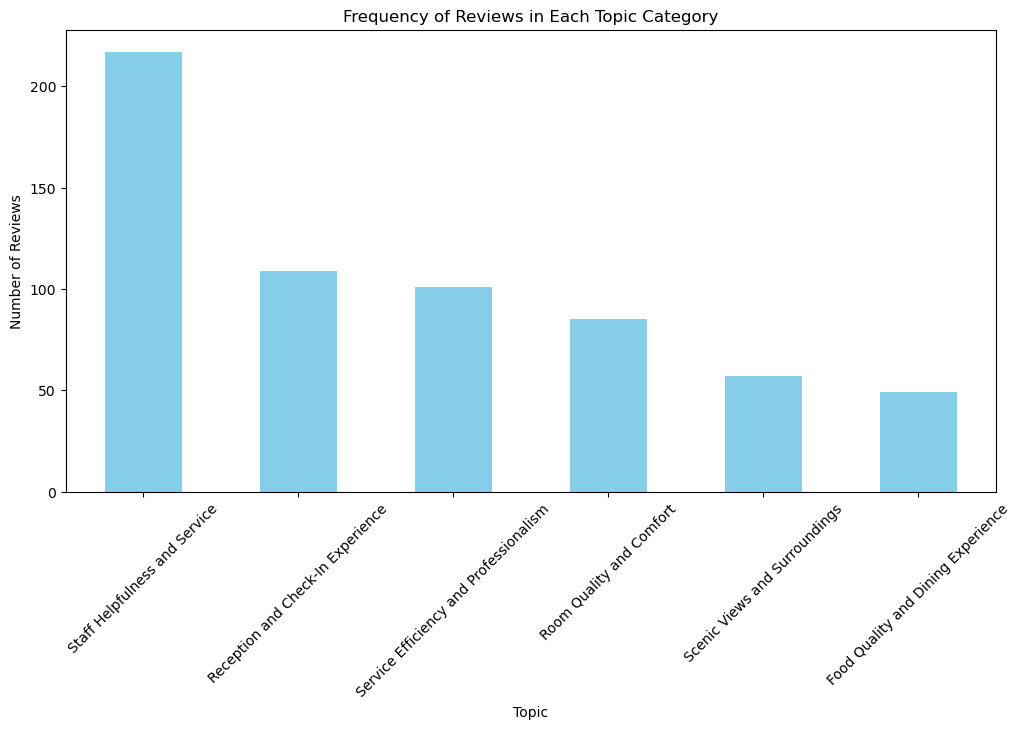

Sentiment distribution within each topic:
Sentiment                               Negative  Neutral  Positive
Topic_Label                                                        
Food Quality and Dining Experience             6        0        43
Reception and Check-In Experience              3       24        82
Room Quality and Comfort                      18       12        55
Scenic Views and Surroundings                  4        1        52
Service Efficiency and Professionalism        10        1        90
Staff Helpfulness and Service                  3        1       213


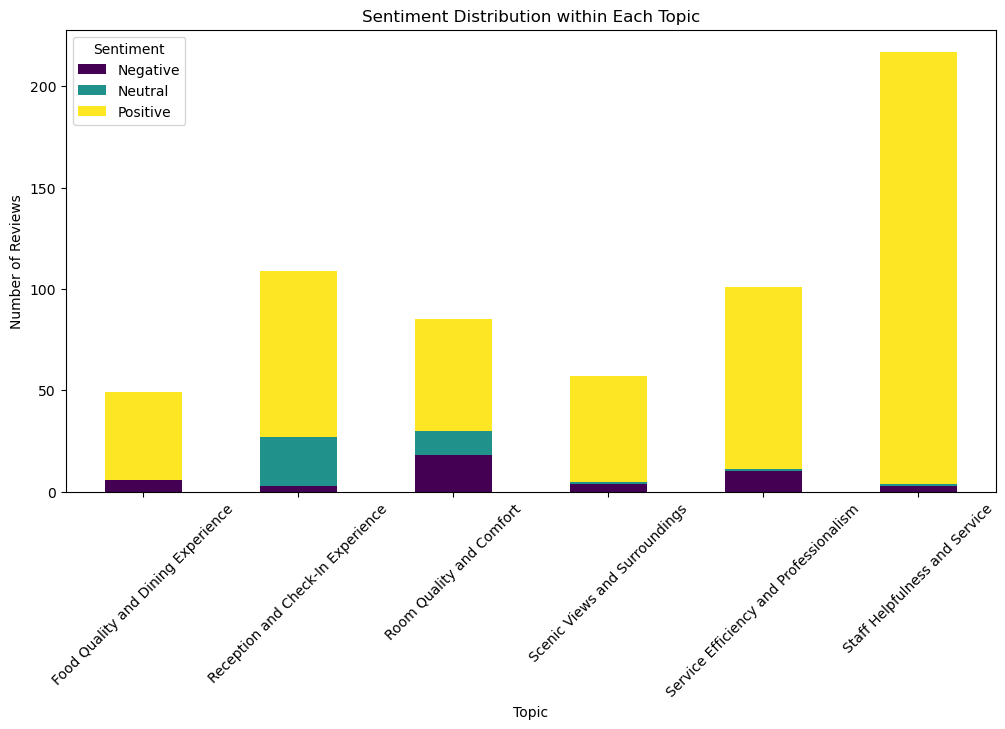

In [17]:
# Combine Review_title and Review_comment columns for analysis
df_reviews['Review'] = df_reviews['Review_title'].fillna('') + ' ' + df_reviews['Review_comment'].fillna('')

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reviews['Review'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

# Get the topics and their corresponding words
topics = lda.components_
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
topic_words = {}
for idx, topic in enumerate(topics):
    topic_words[idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {idx}: ", topic_words[idx])

# Manually assign comprehensive labels based on top words and context
manual_topic_labels = {
    0: 'Room Quality and Comfort',
    1: 'Staff Helpfulness and Service',
    2: 'Reception and Check-In Experience',
    3: 'Scenic Views and Surroundings',
    4: 'Food Quality and Dining Experience',
    5: 'Service Efficiency and Professionalism'
}

# Assign topics to reviews
topic_assignments = lda.transform(X).argmax(axis=1)
df_reviews['Topic'] = topic_assignments

# Apply manual labels to the DataFrame
df_reviews['Topic_Label'] = df_reviews['Topic'].map(manual_topic_labels)

# Save the labeled dataset
df_reviews.to_csv('Merged_reviews_cleaned_labeled_topic II.csv', index=False)

# Quantify reviews by topic category
topic_counts = df_reviews['Topic_Label'].value_counts()
print("Number of reviews per topic:")
print(topic_counts)

# Plot the frequency of reviews in each topic category
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Frequency of Reviews in Each Topic Category')
plt.xticks(rotation=45)
plt.show()

# Analyze sentiment distribution within each topic
sentiment_distribution = df_reviews.groupby(['Topic_Label', 'Sentiment']).size().unstack(fill_value=0)
print("Sentiment distribution within each topic:")
print(sentiment_distribution)

# Plot sentiment distribution for each topic
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution within Each Topic')
plt.xticks(rotation=45)
plt.show()


Combining Topic Identification and Sentiment Analysis:

Number of negative reviews per topic:
Topic_Label
Room Quality and Comfort                  18
Service Efficiency and Professionalism    10
Food Quality and Dining Experience         6
Scenic Views and Surroundings              4
Reception and Check-In Experience          3
Staff Helpfulness and Service              3
Name: count, dtype: int64


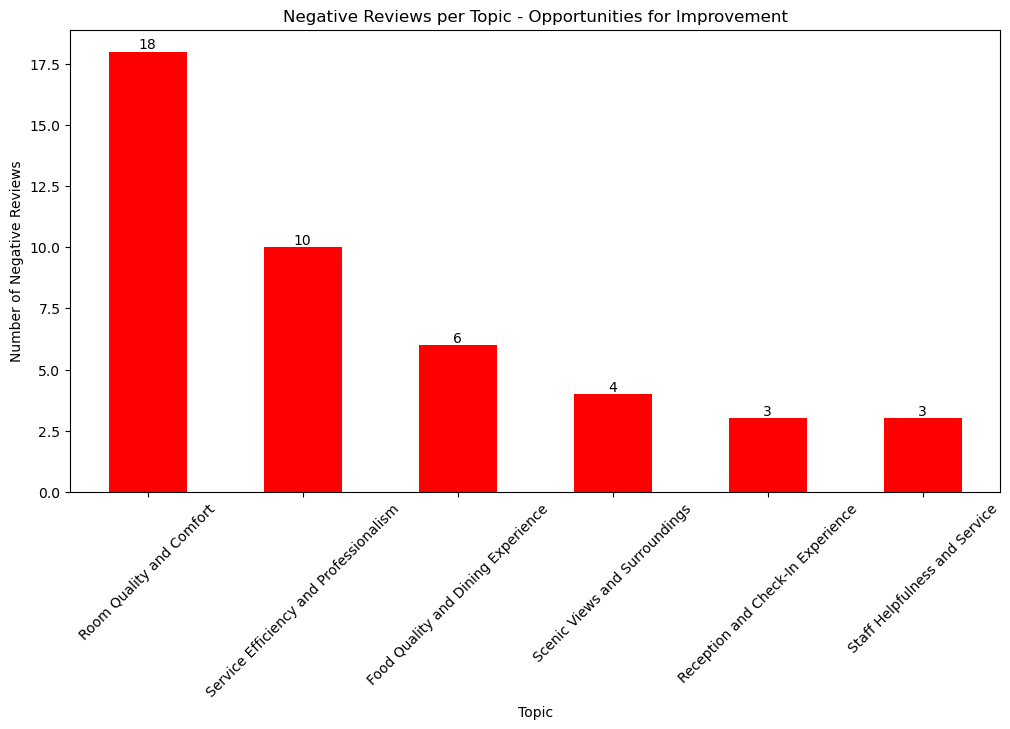

In [13]:
# Using df_reviews directly as it contains sentiment labels
df_combined = df_reviews.copy()

# Convert sentiment labels to lowercase
df_combined['Sentiment'] = df_combined['Sentiment'].str.lower()

# Identify areas of improvement
# Analyze topics with high negative sentiment to identify areas needing improvement
negative_reviews = df_combined[df_combined['Sentiment'] == 'negative']

# Count the number of negative reviews per topic
negative_topic_counts = negative_reviews['Topic_Label'].value_counts()
print("Number of negative reviews per topic:")
print(negative_topic_counts)

# Plot the negative review counts per topic
plt.figure(figsize=(12, 6))
negative_topic_counts.plot(kind='bar', color='red')
plt.xlabel('Topic')
plt.ylabel('Number of Negative Reviews')
plt.title('Negative Reviews per Topic - Opportunities for Improvement')
plt.xticks(rotation=45)
for index, value in enumerate(negative_topic_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


Train and Evaluate Models : Train ML Models for Topic Identification

LDA Topic 0:  ['staff', 'nice', 'pleasant', 'good', 'poor', 'room', 'great', 'food', 'friendly', 'pool']
LDA Topic 1:  ['exceptional', 'hotel', 'staff', 'room', 'stay', 'service', 'nice', 'view', 'clean', 'great']
LDA Topic 2:  ['good', 'great', 'room', 'time', 'comfortable', 'pool', 'service', 'hotel', 'towel', 'working']
LDA Topic 3:  ['food', 'hotel', 'resort', 'haile', 'service', 'staff', 'clean', 'great', 'room', 'delicious']
LDA Topic 4:  ['room', 'staff', 'hotel', 'great', 'resort', 'good', 'stay', 'breakfast', 'work', 'view']
LDA Topic 5:  ['superb', 'staff', 'stay', 'good', 'great', 'location', 'friendly', 'view', 'lake', 'helpful']
NMF Topic 0:  ['room', 'nice', 'hotel', 'staff', 'pool', 'place', 'bed', 'best', 'water', 'day']
NMF Topic 1:  ['exceptional', 'staff', 'nice', 'clean', 'friendly', 'customer', 'amazing', 'food', 'excellent', 'beautiful']
NMF Topic 2:  ['good', 'food', 'nice', 'location', 'spa', 'really', 'time', 'working', 'restaurant', 'worker']
NMF Topic 3:  ['r

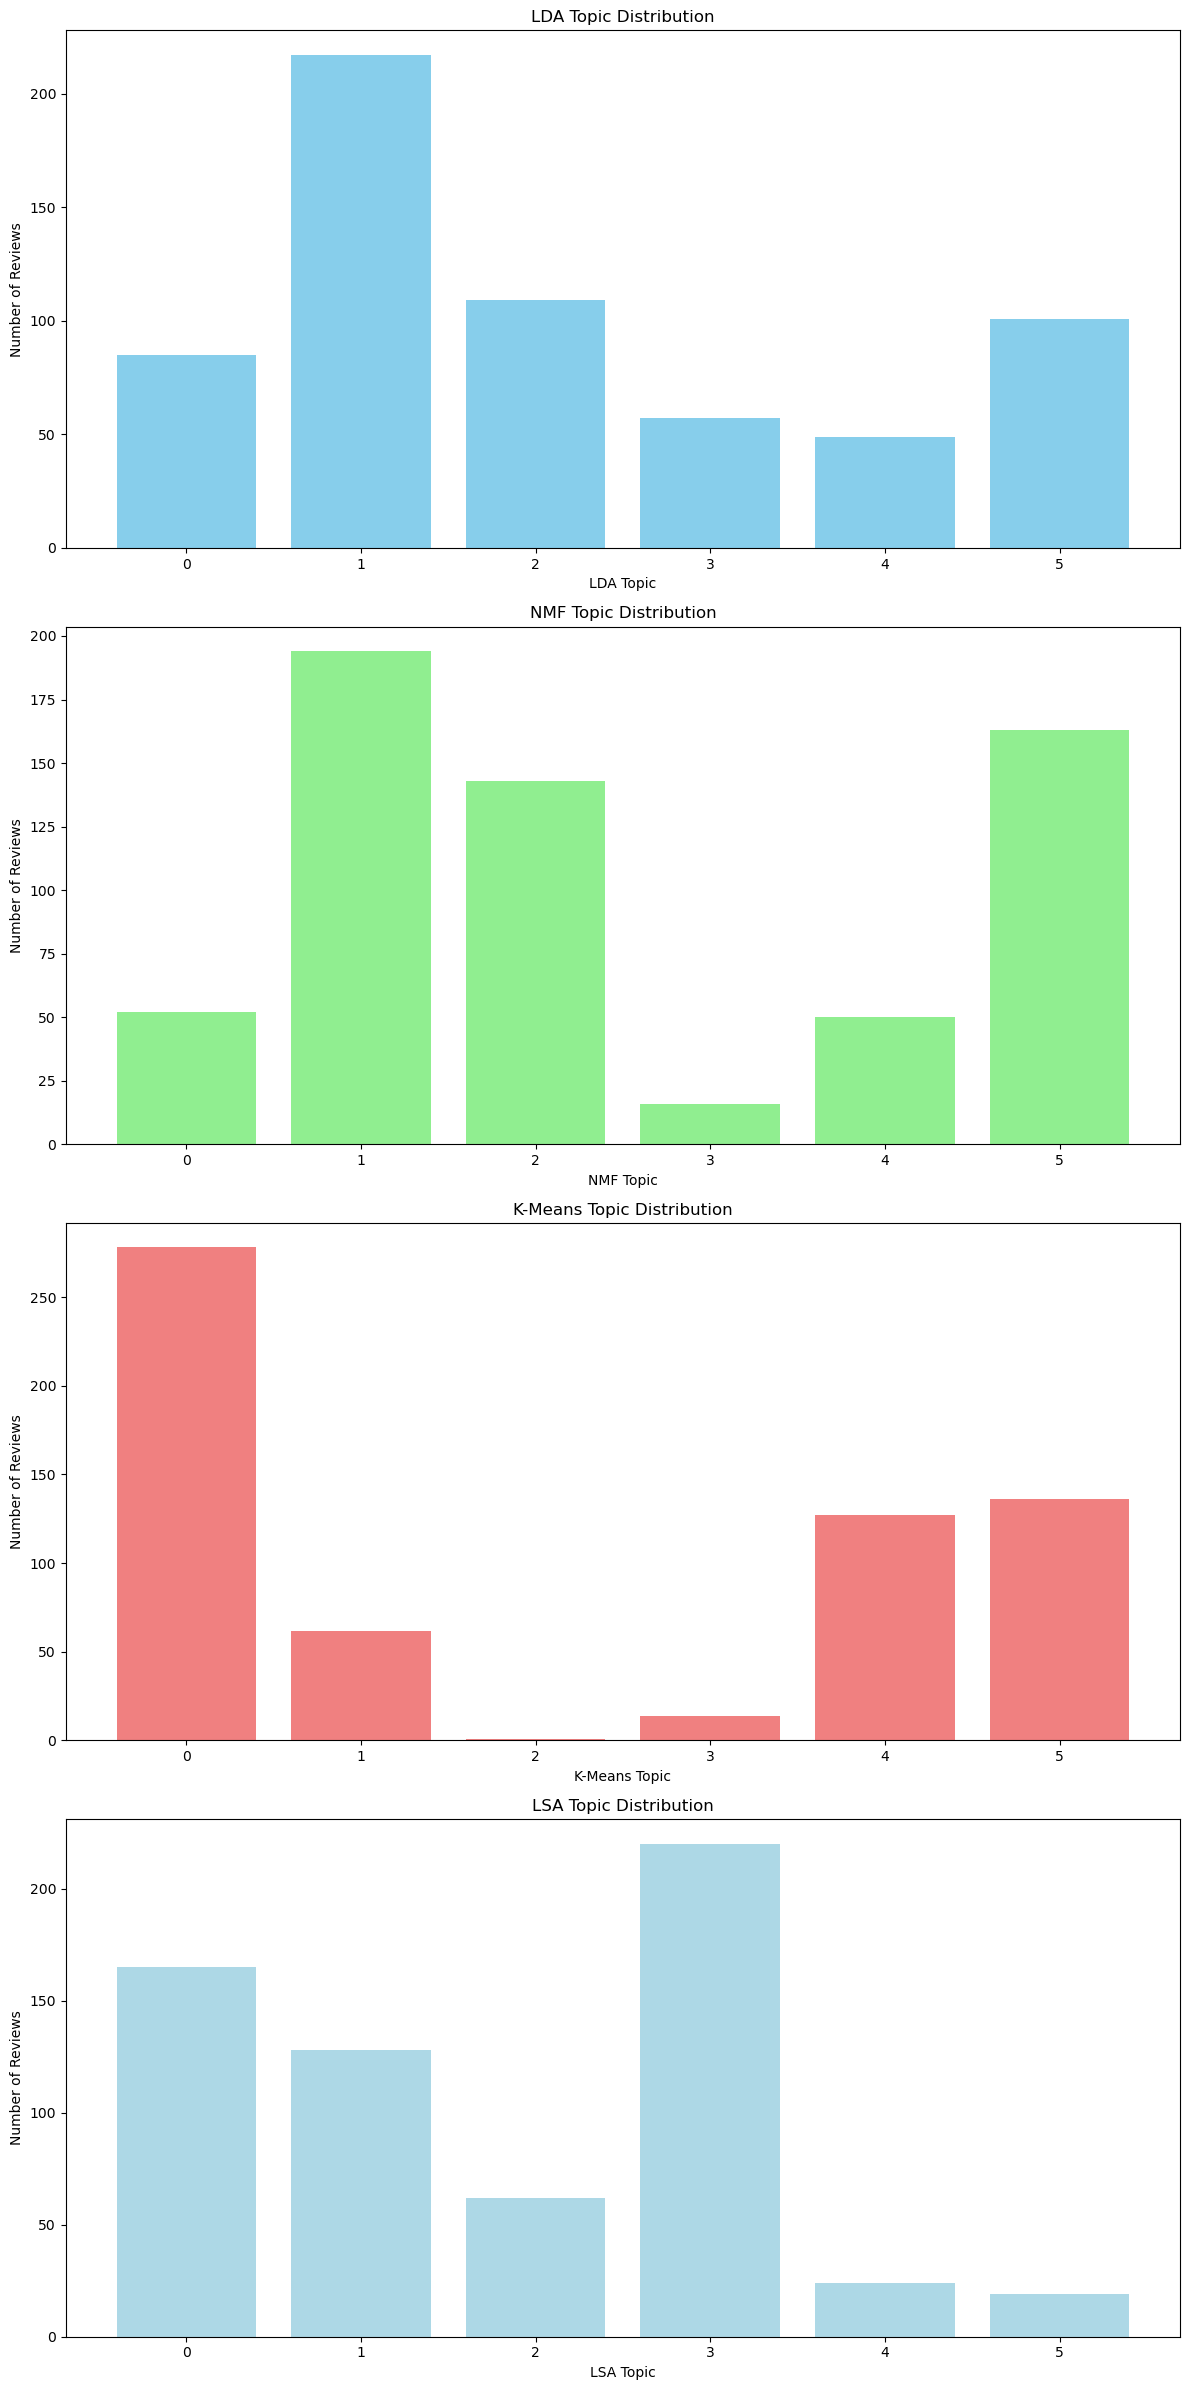

In [15]:
# Specify the full path to the CSV file
file_path = r'D:\Data Science\AAIT\Cap Stone Project\Data\Merged Data\Fillna\Merged_reviews_cleaned_labeledII.csv'

# Load the reviews data from the specified path
df_reviews = pd.read_csv(file_path)

# Combine Review_title and Review_comment columns for analysis
df_reviews['Review'] = df_reviews['Review_title'].fillna('') + ' ' + df_reviews['Review_comment'].fillna('')

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reviews['Review'])

### **1. Latent Dirichlet Allocation (LDA)**
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

# Get the topics and their corresponding words for LDA
lda_topics = lda.components_
feature_names = vectorizer.get_feature_names_out()

lda_topic_words = {}
for idx, topic in enumerate(lda_topics):
    lda_topic_words[idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"LDA Topic {idx}: ", lda_topic_words[idx])

### **2. Non-Negative Matrix Factorization (NMF)**
nmf = NMF(n_components=6, random_state=42)
nmf.fit(X)

# Get the topics and their corresponding words for NMF
nmf_topics = nmf.components_

nmf_topic_words = {}
for idx, topic in enumerate(nmf_topics):
    nmf_topic_words[idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"NMF Topic {idx}: ", nmf_topic_words[idx])

### **3. K-Means Clustering**
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(X)

# Get the topics and their corresponding words for K-Means
kmeans_centers = kmeans.cluster_centers_
order_centroids = kmeans_centers.argsort()[:, ::-1]

kmeans_topic_words = {}
for idx in range(6):
    kmeans_topic_words[idx] = [feature_names[i] for i in order_centroids[idx, :10]]
    print(f"K-Means Topic {idx}: ", kmeans_topic_words[idx])

### **4. Latent Semantic Analysis (LSA)**
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_reviews['Review'])

lsa = TruncatedSVD(n_components=6, random_state=42)
lsa.fit(X_tfidf)

# Get the topics and their corresponding words for LSA
lsa_topics = lsa.components_

lsa_topic_words = {}
for idx, topic in enumerate(lsa_topics):
    lsa_topic_words[idx] = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"LSA Topic {idx}: ", lsa_topic_words[idx])

### **Compare and Assign Topics to Reviews**
def get_topic_model_labels(model, X, n_topics):
    return model.transform(X).argmax(axis=1)

df_reviews['LDA_Topic'] = get_topic_model_labels(lda, X, 6)
df_reviews['NMF_Topic'] = get_topic_model_labels(nmf, X, 6)
df_reviews['KMeans_Topic'] = kmeans.predict(X)
df_reviews['LSA_Topic'] = get_topic_model_labels(lsa, X_tfidf, 6)

# Save the labeled dataset with topics from all four models
df_reviews.to_csv('reviews_labeled_with_all_models.csv', index=False)

### **Visualize the Distribution of Topics from Each Model**
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

### LDA Topics
lda_topic_counts = df_reviews['LDA_Topic'].value_counts()
axes[0].bar(lda_topic_counts.index, lda_topic_counts.values, color='skyblue')
axes[0].set_title('LDA Topic Distribution')
axes[0].set_xlabel('LDA Topic')
axes[0].set_ylabel('Number of Reviews')

### NMF Topics
nmf_topic_counts = df_reviews['NMF_Topic'].value_counts()
axes[1].bar(nmf_topic_counts.index, nmf_topic_counts.values, color='lightgreen')
axes[1].set_title('NMF Topic Distribution')
axes[1].set_xlabel('NMF Topic')
axes[1].set_ylabel('Number of Reviews')

### K-Means Topics
kmeans_topic_counts = df_reviews['KMeans_Topic'].value_counts()
axes[2].bar(kmeans_topic_counts.index, kmeans_topic_counts.values, color='lightcoral')
axes[2].set_title('K-Means Topic Distribution')
axes[2].set_xlabel('K-Means Topic')
axes[2].set_ylabel('Number of Reviews')

### LSA Topics
lsa_topic_counts = df_reviews['LSA_Topic'].value_counts()
axes[3].bar(lsa_topic_counts.index, lsa_topic_counts.values, color='lightblue')
axes[3].set_title('LSA Topic Distribution')
axes[3].set_xlabel('LSA Topic')
axes[3].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


Steps for comparision

In [16]:
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.metrics import silhouette_score

# Prepare data for coherence model
texts = [text.split() for text in df_reviews['Review']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Coherence Score for LDA
lda_topic_list = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_topics]
lda_coherence_model = CoherenceModel(topics=lda_topic_list, texts=texts, dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()

# Coherence Score for NMF
nmf_topic_list = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in nmf_topics]
nmf_coherence_model = CoherenceModel(topics=nmf_topic_list, texts=texts, dictionary=dictionary, coherence='c_v')
nmf_coherence = nmf_coherence_model.get_coherence()

# Coherence Score for LSA
lsa_topic_list = [[tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]] for topic in lsa_topics]
lsa_coherence_model = CoherenceModel(topics=lsa_topic_list, texts=texts, dictionary=dictionary, coherence='c_v')
lsa_coherence = lsa_coherence_model.get_coherence()

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(X, kmeans.labels_)

print(f"LDA Coherence Score: {lda_coherence}")
print(f"NMF Coherence Score: {nmf_coherence}")
print(f"LSA Coherence Score: {lsa_coherence}")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")


LDA Coherence Score: 0.6397140476363966
NMF Coherence Score: 0.6656596705349257
LSA Coherence Score: 0.4963963398404187
K-Means Silhouette Score: 0.21631528039211592


In [ ]:
Conclusion: Top Three Performing Models
Based on these evaluations, the top three performing models are:

NMF: Best coherence score.

LDA: Second-best coherence score.

LSA: Lower coherence score but still a valuable model for topic modeling.

K-Means had the lowest silhouette score, indicating it is the least effective for topic modeling in this context.

Save the top three models (NMF, LDA, and LSA) in PKL format for future use

In [18]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.cluster import KMeans

# Specify the full path to the CSV file
file_path = r'D:\Data Science\AAIT\Cap Stone Project\Data\Merged Data\Fillna\Merged_reviews_cleaned_labeledII.csv'

# Load the reviews data from the specified path
df_reviews = pd.read_csv(file_path)

# Combine Review_title and Review_comment columns for analysis
df_reviews['Review'] = df_reviews['Review_title'].fillna('') + ' ' + df_reviews['Review_comment'].fillna('')

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_reviews['Review'])

### **1. Latent Dirichlet Allocation (LDA)**
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

# Get the topics and their corresponding words for LDA
lda_topics = lda.components_
feature_names = vectorizer.get_feature_names_out()

### **2. Non-Negative Matrix Factorization (NMF)**
nmf = NMF(n_components=6, random_state=42)
nmf.fit(X)

# Get the topics and their corresponding words for NMF
nmf_topics = nmf.components_

### **4. Latent Semantic Analysis (LSA)**
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_reviews['Review'])

lsa = TruncatedSVD(n_components=6, random_state=42)
lsa.fit(X_tfidf)

# Save the models to PKL files
joblib.dump(nmf, 'nmf_model.pkl')
joblib.dump(lda, 'lda_model.pkl')
joblib.dump(lsa, 'lsa_model.pkl')

# Save the vectorizers to PKL files
joblib.dump(vectorizer, 'count_vectorizer.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Models and vectorizers have been saved to PKL files.")


Models and vectorizers have been saved to PKL files.
